# **Auto ML: PyCaret**

Documentação: https://pycaret.gitbook.io/docs

Tutoriais: https://pycaret.gitbook.io/docs/get-started/tutorials

In [1]:
!pip install pycaret -q

## **Classificação**

In [2]:
from pycaret.classification import *
import pandas as pd

In [3]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/customer_churn.csv' -O 'customer_churn.csv'

In [4]:
churn = pd.read_csv('customer_churn.csv')
churn.drop(['customerID'],axis=1, inplace=True)
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn_train = churn.sample(n = int( 0.7*len(churn) ))
churn_test = churn.sample(n = int( 0.3*len(churn) ))
classifier = setup(data=churn_train, target='Churn', fold_strategy = 'kfold', session_id=35)

,Description,Value
0,Session id,35
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(4930, 20)"
5,Transformed data shape,"(4930, 41)"
6,Transformed train set shape,"(3451, 41)"
7,Transformed test set shape,"(1479, 41)"
8,Numeric features,3
9,Categorical features,16


In [6]:
best_model = compare_models(n_select=10, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7699,0.8047,0.7699,0.7654,0.7455,0.3309,0.3552,0.1380
knn,K Neighbors Classifier,0.7685,0.7749,0.7685,0.7619,0.7640,0.3822,0.3841,0.1700
lr,Logistic Regression,0.7641,0.8323,0.7641,0.7559,0.7082,0.2052,0.2746,0.7420
rf,Random Forest Classifier,0.7572,0.7965,0.7572,0.7434,0.7037,0.2021,0.2522,0.2640
svm,SVM - Linear Kernel,0.7464,0.8159,0.7464,0.7818,0.7393,0.3589,0.3940,0.1540
lightgbm,Light Gradient Boosting Machine,0.7427,0.7148,0.7427,0.7000,0.6949,0.1656,0.1912,14.1820
qda,Quadratic Discriminant Analysis,0.7421,0.7937,0.7421,0.7107,0.6635,0.0897,0.1463,0.1440
ridge,Ridge Classifier,0.7383,0.7979,0.7383,0.7002,0.6483,0.0509,0.1061,0.1400
et,Extra Trees Classifier,0.7381,0.7582,0.7381,0.6929,0.6545,0.0629,0.1128,0.2420
lda,Linear Discriminant Analysis,0.7375,0.7232,0.7375,0.6945,0.6496,0.0531,0.1047,0.1460


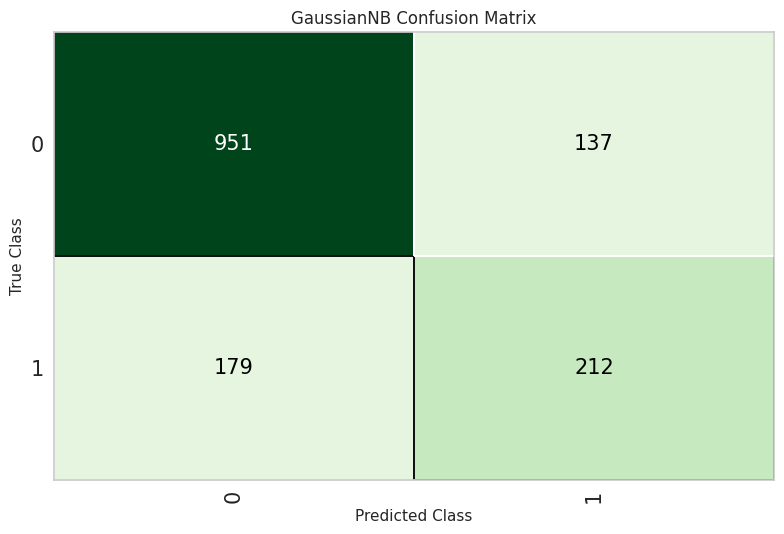

In [7]:
plot_model(best_model[0], plot = 'confusion_matrix')

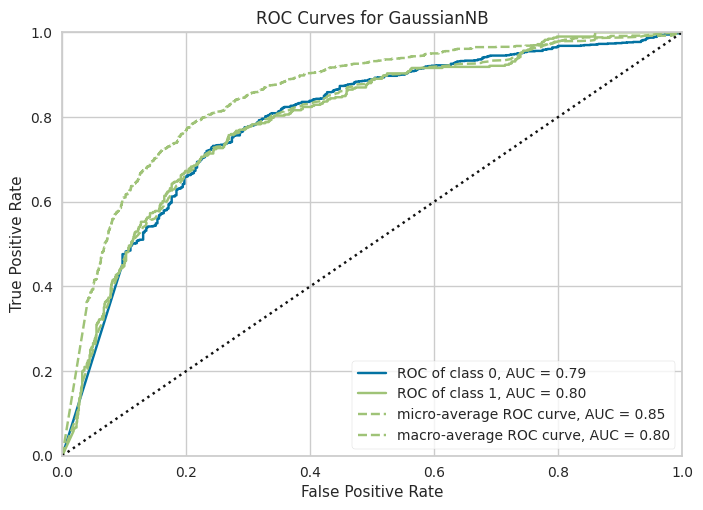

In [8]:
# ROC/AUC
plot_model(best_model[0], plot = 'auc')

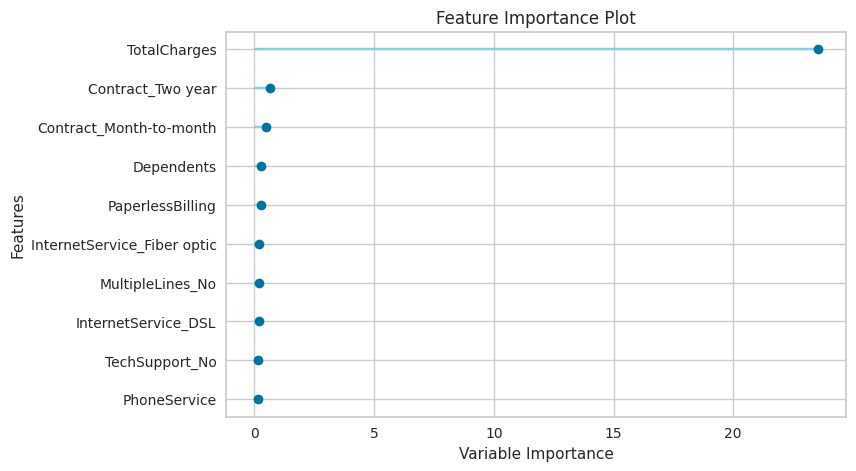

In [9]:
# plot feature importance
plot_model(best_model[2], plot = 'feature')

In [10]:
tunning_best_model = tune_model(best_model[2])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7861,0.8506,0.7861,0.7868,0.7662,0.4418,0.4740
1,0.7739,0.8236,0.7739,0.7610,0.7555,0.3812,0.3998
2,0.8174,0.8295,0.8174,0.8058,0.8049,0.4549,0.4679
3,0.8000,0.8498,0.8000,0.7842,0.7847,0.3916,0.4050
4,0.7710,0.8194,0.7710,0.7541,0.7527,0.3522,0.3677
5,0.8174,0.8261,0.8174,0.8061,0.8092,0.4405,0.4456
6,0.8232,0.8171,0.8232,0.8121,0.8051,0.4347,0.4595
7,0.7971,0.8124,0.7971,0.7855,0.7811,0.4229,0.4406
8,0.8116,0.8172,0.8116,0.7969,0.7887,0.3783,0.4078


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [11]:
final_classifier = finalize_model(tunning_best_model)

## **Regressão**

In [12]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/insurance.csv' -O 'insurance.csv'

In [13]:
# import pycaret regression and init setup
from pycaret.regression import *

In [14]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
insurance_train = insurance.sample(n=int(0.8*len(insurance)))
insurance_test = insurance.sample(n=int(0.2*len(insurance)))
print(insurance_train.shape)
print(insurance_test.shape)

(1070, 7)
(267, 7)


In [16]:
regressor = setup(data=insurance_train, target='charges', fold_strategy = 'kfold', session_id=35)

,Description,Value
0,Session id,35
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1070, 7)"
4,Transformed data shape,"(1070, 10)"
5,Transformed train set shape,"(749, 10)"
6,Transformed test set shape,"(321, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [17]:
# Obtendo os modelos:
regression_models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2653.7554,22721844.4141,4666.9168,0.8336,0.4209,0.2918,0.0610
rf,Random Forest Regressor,2717.7791,23614798.4445,4771.7325,0.8259,0.4480,0.3120,0.1180
lightgbm,Light Gradient Boosting Machine,2854.9218,23808170.6652,4802.9942,0.8246,0.4905,0.3321,17.2770
ada,AdaBoost Regressor,3822.7250,26525868.3936,5098.4168,0.8065,0.5461,0.5642,0.0350
et,Extra Trees Regressor,2842.1709,28362386.4854,5244.5109,0.7886,0.4824,0.3407,0.1140
ridge,Ridge Regression,4360.4314,39394356.6664,6235.1439,0.7111,0.6303,0.4326,0.0320
br,Bayesian Ridge,4355.0811,39388978.3427,6235.0301,0.7111,0.6070,0.4314,0.0300
lar,Least Angle Regression,4347.9543,39386188.9117,6235.2292,0.7110,0.6056,0.4298,0.0310
llar,Lasso Least Angle Regression,4347.8992,39382796.4779,6234.9570,0.7110,0.6066,0.4298,0.0340
lasso,Lasso Regression,4347.8890,39382630.7179,6234.9438,0.7110,0.6066,0.4298,0.0310


In [18]:
rf = create_model('rf')
rf

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2791.4528,21671913.1938,4655.3102,0.8089,0.4521,0.3150
1,2101.0942,14917776.2993,3862.3537,0.9038,0.4167,0.1850
2,2697.1625,29068671.7361,5391.5370,0.7770,0.5371,0.2545
3,3467.9986,35508531.8100,5958.9036,0.7428,0.4875,0.3756
4,2356.9100,15251297.3741,3905.2909,0.8754,0.4675,0.4240
5,2288.3816,16067283.3821,4008.4016,0.9153,0.3820,0.2707
6,2716.6582,21244824.7659,4609.2109,0.8219,0.4430,0.2939
7,3180.2510,29329956.4757,5415.7138,0.8277,0.4424,0.3262
8,3429.1928,40520458.9427,6365.5682,0.7143,0.4827,0.3664


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, monotonic_cst=None,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=35, verbose=0, warm_start=False)

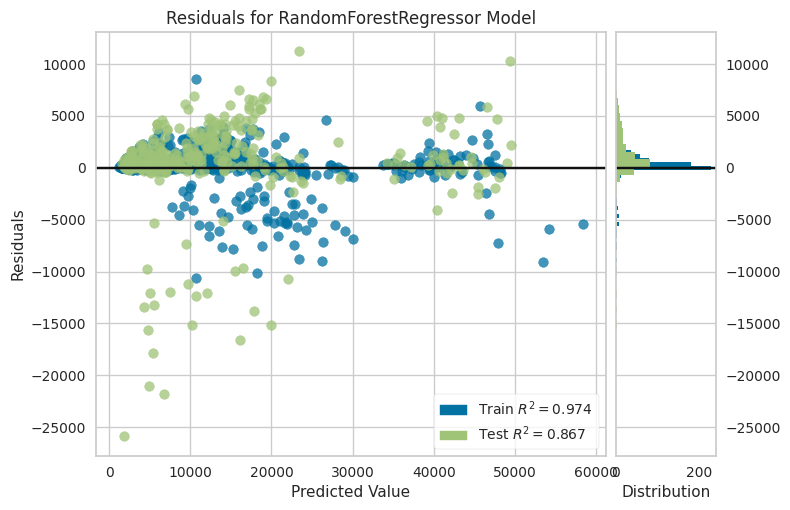

In [19]:
# Resíudos:
plot_model(rf, plot = 'residuals')

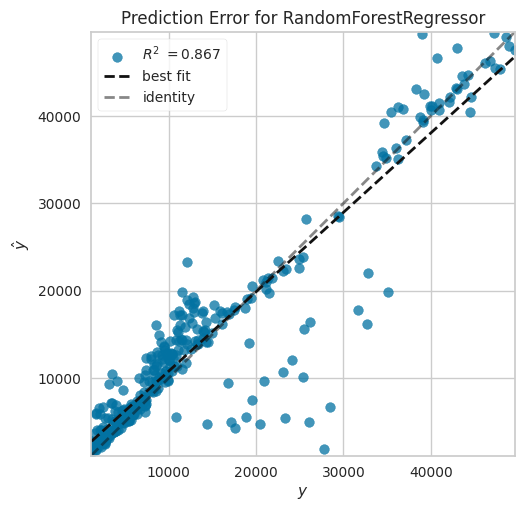

In [20]:
# Erro:
plot_model(rf, plot = 'error')

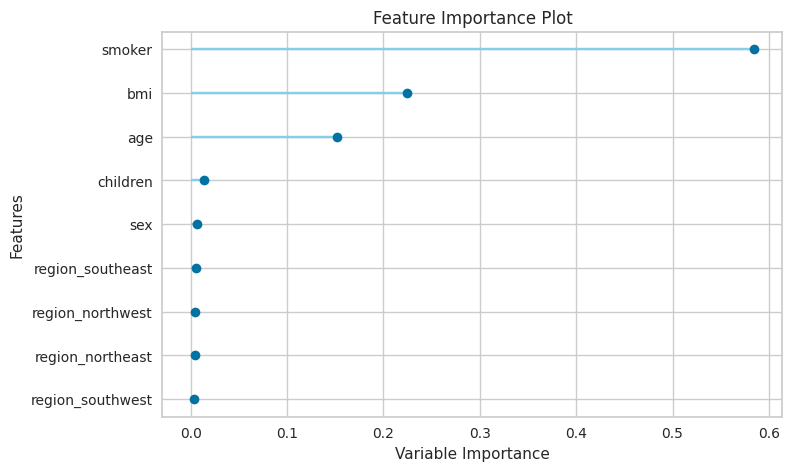

In [21]:
# Feature importance
plot_model(rf, plot = 'feature')

In [22]:
# predict model on new_data
predictions = predict_model(rf, data = insurance_test)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1821.4387,13778773.2615,3711.9770,0.8867,0.3511,0.2148


,age,sex,bmi,children,smoker,region,charges,prediction_label
1238,37,male,22.705000,3,no,northeast,6985.506836,8180.056680
928,62,female,39.160000,0,no,southeast,13470.804688,13940.432207
655,52,female,25.299999,2,yes,southeast,24667.419922,24131.486660
563,50,male,44.770000,1,no,southeast,9058.730469,9120.391572
239,44,male,38.060001,1,no,southeast,7152.671387,8394.106855


In [23]:
# tuned_rf = tune_model(rf)

### **Salvando/exportando um modelo de ML**

Exportando:
```python
import pickle
from sklearn.linear_model import LinearRegression

# Treine seu modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Salve o modelo em um arquivo
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
```

Carregando o modelo (a partir do arquivo):
```python
# Carregue o modelo
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use o modelo carregado para previsões
predictions = loaded_model.predict(X_test)
```

In [24]:
import pickle

with open('rf.pkl', 'wb') as file:
  pickle.dump(rf, file)

In [25]:
with open('rf.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
loaded_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, monotonic_cst=None,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=35, verbose=0, warm_start=False)